In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Import training and validation sets
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Manually adjust df_train to match df_test

In [61]:
df_train['BsmtFinSF1_is_missing'] = False

In [62]:
df_train['BsmtFinSF2_is_missing'] = False

In [63]:
df_train['BsmtFullBath_is_missing'] = False

In [64]:
df_train['BsmtHalfBath_is_missing'] = False

In [65]:
df_train['BsmtUnfSF_is_missing'] = False

In [66]:
df_train['GarageArea_is_missing'] = False

In [67]:
df_train['GarageCars_is_missing'] = False

In [68]:
df_train['TotalBsmtSF_is_missing'] = False

In [69]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,BsmtFinSF1_is_missing,BsmtFinSF2_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,BsmtUnfSF_is_missing,GarageArea_is_missing,GarageCars_is_missing,TotalBsmtSF_is_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,208500,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,181500,False,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,223500,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,140000,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,250000,False,False,False,False,False,False,False,False


In [ ]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_tmp['BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'] = False
df_tmp.head()

In [20]:
df_train['BsmtFinSF1_is_missing'] = False

In [22]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinSF1_is_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,False


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   MSSubClass               1460 non-null   int64  
 2   MSZoning                 1460 non-null   object 
 3   LotFrontage              1201 non-null   float64
 4   LotArea                  1460 non-null   int64  
 5   Street                   1460 non-null   object 
 6   Alley                    91 non-null     object 
 7   LotShape                 1460 non-null   object 
 8   LandContour              1460 non-null   object 
 9   Utilities                1460 non-null   object 
 10  LotConfig                1460 non-null   object 
 11  LandSlope                1460 non-null   object 
 12  Neighborhood             1460 non-null   object 
 13  Condition1               1460 non-null   object 
 14  Condition2              

In [71]:
df_train.isna().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                259
LotArea                      0
                          ... 
BsmtHalfBath_is_missing      0
BsmtUnfSF_is_missing         0
GarageArea_is_missing        0
GarageCars_is_missing        0
TotalBsmtSF_is_missing       0
Length: 89, dtype: int64

In [72]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [73]:
df_train.YrSold.dtype

dtype('int64')

<AxesSubplot:ylabel='Frequency'>

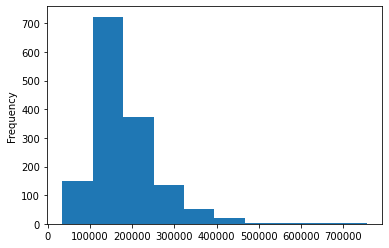

In [74]:
df_train.SalePrice.plot.hist()

In [75]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,BsmtFinSF1_is_missing,BsmtFinSF2_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,BsmtUnfSF_is_missing,GarageArea_is_missing,GarageCars_is_missing,TotalBsmtSF_is_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,208500,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,181500,False,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,223500,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,140000,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,250000,False,False,False,False,False,False,False,False


In [76]:
df_train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
BsmtHalfBath_is_missing,False,False,False,False,False
BsmtUnfSF_is_missing,False,False,False,False,False
GarageArea_is_missing,False,False,False,False,False
GarageCars_is_missing,False,False,False,False,False


In [77]:
df_train.YrSold.head(20)

0     2008
1     2007
2     2008
3     2006
4     2008
5     2009
6     2007
7     2009
8     2008
9     2008
10    2008
11    2006
12    2008
13    2007
14    2008
15    2007
16    2010
17    2006
18    2008
19    2009
Name: YrSold, dtype: int64

### Sort DataFrame by SaleYear

When working with time series data, it's a good idea to sort it by date.

In [80]:
# Sort DataFrame in Year order
df_train.sort_values(by=["YrSold"], inplace=True, ascending=True)
df_train.YrSold.head(20)

781     2006
134     2006
668     2006
669     2006
1346    2006
130     2006
129     2006
128     2006
1394    2006
672     2006
851     2006
1434    2006
804     2006
125     2006
806     2006
829     2006
824     2006
737     2006
69      2006
81      2006
Name: YrSold, dtype: int64

In [81]:
# Check the values of different columns
df_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [82]:
len(df_train)

1460

In [83]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

ValueError: could not convert string to float: 'RL'

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   MSSubClass               1460 non-null   int64  
 2   MSZoning                 1460 non-null   object 
 3   LotFrontage              1201 non-null   float64
 4   LotArea                  1460 non-null   int64  
 5   Street                   1460 non-null   object 
 6   Alley                    91 non-null     object 
 7   LotShape                 1460 non-null   object 
 8   LandContour              1460 non-null   object 
 9   Utilities                1460 non-null   object 
 10  LotConfig                1460 non-null   object 
 11  LandSlope                1460 non-null   object 
 12  Neighborhood             1460 non-null   object 
 13  Condition1               1460 non-null   object 
 14  Condition2            

In [85]:
df_train.isna().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                259
LotArea                      0
                          ... 
BsmtHalfBath_is_missing      0
BsmtUnfSF_is_missing         0
GarageArea_is_missing        0
GarageCars_is_missing        0
TotalBsmtSF_is_missing       0
Length: 89, dtype: int64

### Covert String into Categories

In [87]:
df_train.head().T

,781,134,668,669,1346
Id,782,135,669,670,1347
MSSubClass,60,20,20,30,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,78.0,NaN,80.0,NaN
LotArea,7153,10335,14175,11600,20781
...,...,...,...,...,...
BsmtHalfBath_is_missing,False,False,False,False,False
BsmtUnfSF_is_missing,False,False,False,False,False
GarageArea_is_missing,False,False,False,False,False
GarageCars_is_missing,False,False,False,False,False


In [88]:
pd.api.types.is_string_dtype(df_train["MSZoning"])

True

In [89]:
# Find the columns which contain strings
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [92]:
# This will turn all of the string value into category values
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Id                       1460 non-null   int64   
 1   MSSubClass               1460 non-null   int64   
 2   MSZoning                 1460 non-null   category
 3   LotFrontage              1201 non-null   float64 
 4   LotArea                  1460 non-null   int64   
 5   Street                   1460 non-null   category
 6   Alley                    91 non-null     category
 7   LotShape                 1460 non-null   category
 8   LandContour              1460 non-null   category
 9   Utilities                1460 non-null   category
 10  LotConfig                1460 non-null   category
 11  LandSlope                1460 non-null   category
 12  Neighborhood             1460 non-null   category
 13  Condition1               1460 non-null   category
 14  Condit

In [95]:
df_train.Street.cat.categories

Index(['Grvl', 'Pave'], dtype='object')

In [96]:
df_train.Street.cat.codes

781     1
134     1
668     1
669     1
1346    1
       ..
66      1
762     1
832     1
1267    1
1284    1
Length: 1460, dtype: int8

In [98]:
# Check missing data
df_train.isnull().sum()/len(df_train)

Id                         0.000000
MSSubClass                 0.000000
MSZoning                   0.000000
LotFrontage                0.177397
LotArea                    0.000000
                             ...   
BsmtHalfBath_is_missing    0.000000
BsmtUnfSF_is_missing       0.000000
GarageArea_is_missing      0.000000
GarageCars_is_missing      0.000000
TotalBsmtSF_is_missing     0.000000
Length: 89, dtype: float64

## Fill missing values 

### Fill numerical missing values first

In [99]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
BsmtFinSF1_is_missing
BsmtFinSF2_is_missing
BsmtFullBath_is_missing
BsmtHalfBath_is_missing
BsmtUnfSF_is_missing
GarageArea_is_missing
GarageCars_is_missing
TotalBsmtSF_is_missing


In [100]:
df_train.Street

781     Pave
134     Pave
668     Pave
669     Pave
1346    Pave
        ... 
66      Pave
762     Pave
832     Pave
1267    Pave
1284    Pave
Name: Street, Length: 1460, dtype: category
Categories (2, object): ['Grvl' < 'Pave']

In [101]:
# Check for which numeric columns have null values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [102]:
# Fill numeric rows with the median
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_train[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_train[label] = content.fillna(content.median())

In [103]:
# Check if there's any null numeric values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [104]:
# Check to see how many examples were missing
df_train.LotFrontage_is_missing.value_counts()

False    1201
True      259
Name: LotFrontage_is_missing, dtype: int64

In [105]:
df_train.isna().sum()

Id                        0
MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
                         ..
GarageCars_is_missing     0
TotalBsmtSF_is_missing    0
LotFrontage_is_missing    0
MasVnrArea_is_missing     0
GarageYrBlt_is_missing    0
Length: 92, dtype: int64

### Filling and turning categorical variables into numbers

In [106]:
# Check for columns which aren't numeric
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [107]:
# Turn categorical variables into numbers and fill missing
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_train[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_train[label] = pd.Categorical(content).codes+1

In [108]:
pd.Categorical(df_train["Street"]).codes+1

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [109]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Columns: 135 entries, Id to SaleCondition_is_missing
dtypes: bool(54), float64(3), int64(35), int8(43)
memory usage: 583.1 KB


In [110]:
df_train.head().T

,781,134,668,669,1346
Id,782,135,669,670,1347
MSSubClass,60,20,20,30,20
MSZoning,4,4,4,4,4
LotFrontage,65.0,78.0,69.0,80.0,69.0
LotArea,7153,10335,14175,11600,20781
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,False,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False


In [134]:
df_tmp.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 127, dtype: int64

### Building Machine Learning Model

In [111]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
781,782,60,4,65.0,7153,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
134,135,20,4,78.0,10335,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
668,669,20,4,69.0,14175,2,0,4,1,1,...,False,False,False,False,False,True,True,True,False,False
669,670,30,4,80.0,11600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1346,1347,20,4,69.0,20781,2,0,2,4,1,...,False,False,False,False,False,True,True,True,False,False


In [113]:
len(df_train)

1460

In [114]:
%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor(n_jobs=-1, random_state=42)

In [115]:
# Score the model
model.score(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

0.9797024033398863

### Splitting data into train/validation sets

In [116]:
df_train.YrSold

781     2006
134     2006
668     2006
669     2006
1346    2006
        ... 
66      2010
762     2010
832     2010
1267    2010
1284    2010
Name: YrSold, Length: 1460, dtype: int64

In [117]:
df_train.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [118]:
# Split data into training and validation
df_val = df_train[df_train.YrSold == 2010]
df_train = df_train[df_train.YrSold != 2010]

len(df_val), len(df_train)

(175, 1285)

In [121]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1285, 134), (1285,), (175, 134), (175,))

In [122]:
y_train

781     175900
134     180000
668     168000
669     137500
1346    262500
         ...  
143     204000
146     105000
1300    225000
315     188500
1323     82500
Name: SalePrice, Length: 1285, dtype: int64

### Building an evaluation function

In [123]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [124]:
%time
model = RandomForestRegressor(n_jobs=-1, 
                               random_state=42)

model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor(n_jobs=-1, random_state=42)

In [125]:
show_scores(model)

{'Training MAE': 6554.855813229571,
 'Valid MAE': 15946.736628571429,
 'Training RMSLE': 0.06037770808796499,
 'Valid RMSLE': 0.13454271386685246,
 'Training R^2': 0.9800940220993968,
 'Valid R^2': 0.8990784897154407}

### Hyerparameter tuning with RandomizedSearchCV

In [126]:
%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}
           

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [127]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_features': 0.5,
 'max_depth': 10}

In [128]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 13203.518280627033,
 'Valid MAE': 17179.9852844647,
 'Training RMSLE': 0.11597003930314874,
 'Valid RMSLE': 0.14711731913388434,
 'Training R^2': 0.9093665326845499,
 'Valid R^2': 0.8802390806140326}

### Train a model with the best hyperparamters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`.

In [129]:
%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [130]:
# Scores for ideal_model 
show_scores(ideal_model)

{'Training MAE': 10628.104232630893,
 'Valid MAE': 16471.374810700705,
 'Training RMSLE': 0.09209380838195635,
 'Valid RMSLE': 0.1410028014165139,
 'Training R^2': 0.9491272377605909,
 'Valid R^2': 0.8909707543363813}

In [131]:
# Scores on rs_model 
show_scores(rs_model)

{'Training MAE': 13203.518280627031,
 'Valid MAE': 17179.985284464696,
 'Training RMSLE': 0.11597003930314874,
 'Valid RMSLE': 0.14711731913388432,
 'Training R^2': 0.9093665326845499,
 'Valid R^2': 0.8802390806140326}

## Make predictions on test data

In [132]:
# Import the test data
df_test = pd.read_csv("Test.csv",
                      low_memory=False)

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [134]:
df_test.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622,14267,13830,9978,5005
...,...,...,...,...,...
MiscVal,0,12500,0,0,0
MoSold,6,6,3,6,1
YrSold,2010,2010,2010,2010,2010
SaleType,WD,WD,WD,WD,WD


In [135]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
   
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [137]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [140]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [141]:
test_preds

array([126217.77863511, 152103.27059187, 172949.56909079, ...,
       157736.59316149, 115384.11465895, 224162.26864111])

In [145]:
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,126217.778635
1,1462,152103.270592
2,1463,172949.569091
3,1464,181554.657168
4,1465,196336.833060
...,...,...
1454,2915,86366.310193
1455,2916,88939.863481
1456,2917,157736.593161
1457,2918,115384.114659


In [146]:
# Export prediction data
df_preds.to_csv("test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [147]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([1.76649923e-03, 1.68393142e-03, 1.64034487e-03, 5.52272800e-03,
       1.47175562e-02, 3.48242169e-06, 2.89703137e-04, 7.83174803e-04,
       1.31272324e-03, 0.00000000e+00, 3.36333003e-04, 7.73236436e-04,
       3.87395820e-03, 7.82441539e-05, 6.22516477e-06, 1.00374311e-03,
       7.83692274e-04, 4.07574298e-01, 5.04032689e-03, 1.76693623e-02,
       8.24243410e-03, 3.37374405e-04, 1.10118532e-05, 1.12299708e-03,
       8.33962142e-04, 7.62424006e-04, 7.28857080e-03, 4.22758949e-02,
       4.31747035e-04, 3.11044140e-04, 1.05734730e-02, 3.50784365e-04,
       1.45922617e-03, 9.95548942e-04, 1.94979458e-02, 1.54423112e-04,
       8.27506463e-04, 3.98077005e-03, 2.82568945e-02, 2.30177513e-04,
       5.33776181e-04, 1.85638406e-03, 8.83283074e-05, 2.70879883e-02,
       3.25869728e-02, 1.92649404e-05, 1.30231086e-01, 1.39782236e-03,
       3.02410429e-04, 2.09065996e-02, 7.68786003e-04, 2.11606605e-03,
       9.29846568e-04, 4.37230045e-03, 6.09915021e-03, 5.43889677e-04,
      

In [148]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

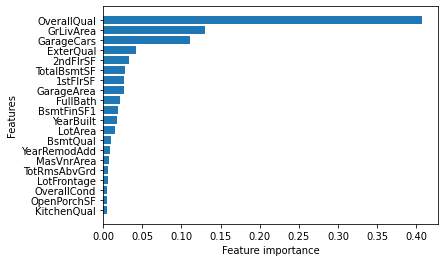

In [149]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [153]:
df_test["GarageCars"].value_counts()

2.0    771
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64